# NLP - Prova 1

Nesta prova, utilizaremos um dataset fornecido por uma empresa de e-commerce. Trata-se de um dataset que contém reviews de pedidos feitos na Internet ou através do aplicativo. Cada review tem uma nota (*score*) que vai de 1 (muito ruim) a 5 (muito bom). Também, cada review tem uma mensagem deixada pelo cliente, que pode esclarecer o que levou à atribuição da nota. O dataset é o seguinte:

In [15]:
import pandas as pd 
df = pd.read_csv('reviews.csv')
df.head()

review_id  review_score  \
0  e64fb393e7b32834bb789ff8bb30750e             5   
1  f7c4243c7fe1938f181bec41a392bdeb             5   
2  8670d52e15e00043ae7de4c01cc2fe06             4   
3  4b49719c8a200003f700d3d986ea1a19             4   
4  3948b09f7c818e2d86c9a546758b2335             5   

                              review_comment_message  
0              Recebi bem antes do prazo estipulado.  
1  Parabéns lojas lannister adorei comprar pela I...  
2  aparelho eficiente. no site a marca do aparelh...  
3    Mas um pouco ,travando...pelo valor ta Boa.\r\n  
4  Vendedor confiável, produto ok e entrega antes...

A empresa, porém, gostaria de saber quais são os aspectos em que pode melhorar. Para fazer isso, jogou todos os reviews em um LLM (o procedimento para isso está em `consultar_llm.py`, que acompanha este notebook), e então coletou as respostas. Em sua execução, o LLM retornou o seguinte:

## RESPOSTA DO LLM

Para identificar os elementos mais elogiados e reclamados, vou analisar as avaliações buscando palavras-chave e temas recorrentes.

**Elogios Mais Comuns:**

*   **Entrega Rápida/No Prazo:** Este é o elogio mais frequente. Termos como "chegou antes do prazo", "entrega rápida", "no prazo" aparecem repetidamente.
*   **Produto Bom/Excelente Qualidade:** Muitos clientes expressam satisfação com a qualidade do produto em si. Palavras como "excelente", "bom", "perfeito", "recomendo", "atendeu minhas expectativas", "cumpre o que promete" são comuns.
*   **Bom Atendimento/Comunicação:** Alguns clientes elogiam a comunicação clara e eficiente com o vendedor.
*   **Embalagem:** Alguns clientes elogiaram a forma como o produto foi embalado.

**Reclamações Mais Comuns:**

*   **Não Recebimento do Produto:** Esta é a reclamação mais grave e frequente. Várias avaliações mencionam "não recebi o produto" ou "ainda não recebi".
*   **Atraso na Entrega:** Mesmo quando o produto é entregue, o atraso é uma reclamação comum.
*   **Produto com Defeito/Danificado:** Alguns clientes relatam receber produtos com defeito, amassados ou com peças faltando.
*   **Produto Errado:** Alguns clientes relatam ter recebido o produto errado.
*   **Problemas com a Compra/Cancelamento:** Alguns clientes relatam problemas com o cancelamento da compra.
*   **Problemas com a Comunicação:** Alguns clientes reclamam da dificuldade em se comunicar com o vendedor após a compra ou da falta de resposta às suas dúvidas.
*   **Voltagem Errada:** Um cliente reclamou que o produto veio com a voltagem errada.
*   **Qualidade do Produto Abaixo do Esperado:** Alguns clientes expressam insatisfação com a qualidade do produto, mencionando material ruim, acabamento imperfeito ou falsificação.
*   **Problemas com a Entrega pelos Correios:** Um cliente reclamou do serviço dos correios.

**Resumo:**

*   **Elogios:** Entrega rápida/no prazo e boa qualidade do produto são os pontos fortes.
*   **Reclamações:** Problemas com a entrega (não recebimento, atraso) e produtos com defeito/qualidade inferior são os principais pontos fracos.

**Recomendações:**

A empresa deve priorizar a melhoria dos processos de entrega para garantir que os produtos cheguem aos clientes no prazo e em perfeitas condições. Além disso, deve investir no controle de qualidade dos produtos e na comunicação com os clientes para resolver problemas de forma rápida e eficiente.


## Discussão

Mesmo que o LLM possa dar pistas importantes para o desenvolvimento desta solução, há um problemaa fundamental em simplesmente "acreditar" nessa resposta: ela não tem base em dados nem em uma metodologia científica, então é impossível criticá-la, replicá-la ou saber de suas limitações.

A tarefa neste exercício é encontrar dados, usando metodologias clássicas de NLP, que corroborem ou que contradigam a conclusão trazida pelo LLM.


# Exercícios

## Exercício 1

Faça e avalie (usando uma métrica) um modelo preditivo baseado no modelo Bag-of-Words capaz de prever, à partir do texto do review, se ele será positivo (notas 4 ou 5) ou negativo (notas 1, 2 ou 3). Use estratégias adequadas para mostrar que o modelo não está enviesado (por exemplo, retornando sempre 'positivo' para o review). Justifique todas as suas decisões (tipo de vetorizador, tipo de classificador, métrica(s) usada(s) para avaliação) em comentários no código.

Dica: `df['positivo'] = df['review_score'].apply(lambda x: x > 3)`

/Users/luccahiratsuca/Github/Insper/7 Semestre/nlp_course/env/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'essa', 'essas', 'esse', 'esses', 'esta', 'estas', 'este', 'estes', 'eu', 'havia', 'isso', 'isto', 'já', 'lhe', 'lhes', 'mais', 'mas', 'me', 'mesmo', 'meu', 'meus', 'minha', 'muito', 'na', 'nas', 'nem', 'no', 'nos', 'nosso', 'num', 'numa', 'não', 'nós', 'os', 'ou', 'para', 'pela', 'pelas', 'pelo', 'pelos', 'por', 'qual', 'quando', 'que', 'quem', 'se', 'sem', 'ser', 'seu', 'seus', 'sua', 'suas', 'só', 'também', 'te', 'ter', 'teu', 'tu', 'têm', 'um', 'uma', 'você', 'vocês', 'vos', 'às'] not in stop_words.
  warnings.warn(


Accuracy: 0.90
              precision    recall  f1-score   support

       False       0.85      0.86      0.85      2917
        True       0.92      0.92      0.92      5279

    accuracy                           0.90      8196
   macro avg       0.89      0.89      0.89      8196
weighted avg       0.90      0.90      0.90      8196



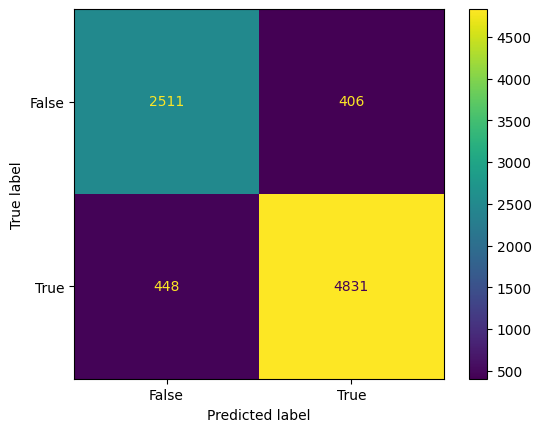

In [ ]:
#exercicio1
#não apague o comentário acima!!!
# Faça todo o seu código (e também os comentários) nesta célula!
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Nesse caso, iremos utilizar as stopwords para remover palavras que não são informativas, como "a", "e", "o", "de", etc.
# Obtive esse `stopwords.txt` de 'https://gist.github.com/alopes/5358189', que é uma lista de stopwords em português.
# Portanto, irei carregar a lista de stopwords.
STOP_WORDS = './stopwords.txt'
with open(STOP_WORDS, 'r') as f:
    stopwords = f.read().splitlines()

# Aqui, irei fazer uma rápida transformação, onde crio uma nova coluna chamada `sentiment` que indica se o review é positivo ou negativo.
# Para isso, irei considerar que um review é positivo se a `review_score` for maior que 3 e negativo caso contrário.
# Portanto, irei adicionar a coluna `sentiment` ao dataframe.
# Isso é importante, pois iremos utilizar essa coluna como rótulo para treinar o modelo de classificação (0 ou 1).
df['sentiment'] = df['review_score'].apply(lambda x: x>3)

# Aqui, irei utilizar um modelo de ensemble, que é uma técnica que combina vários modelos de aprendizado de máquina para melhorar a precisão e a estabilidade do modelo.
# Nesse caso, irei combinar três modelos de classificação: Regressão Logística, Random Forest e Naive Bayes. Irei utilizar esses 3 pois:

# O modelo de Regressão Logística é um modelo linear que é usado para classificação binária.
# O modelo de Random Forest é um modelo de árvore de decisão que é usado para classificação e regressão.
# O modelo de Naive Bayes é um modelo probabilístico que é usado para classificação.

# Portanto, ao combinar esses três modelos, podemos obter um modelo de ensemble que é mais preciso e estável do que qualquer um dos modelos individuais.
classifier = VotingClassifier([('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('nb', BernoulliNB())])

# Aqui, irei criar um pipeline que irá pré-processar os dados e treinar o modelo de ensemble.
# Irei utilizar o vetorizar `TfidfVectorizer`, pois ele converte uma coleção de documentos de texto em uma matriz de recursos TF-IDF. 

# Justificativa:
# Ao contrário do `CountVectorizer`, o `TfidfVectorizer` leva em consideração a frequência com que uma palavra aparece em um documento e em todos os documentos.
# Isso é útil porque palavras que aparecem com frequência em todos os documentos são menos informativas do que palavras que aparecem com frequência em um documento específico.
# Ou seja, o `CountVectorizer` não leva em consideração a importância das palavras, enquanto o `TfidfVectorizer` leva em consideração a importância das palavras.
# E, outro ponto relevante, foi o teste das duas maneiras, onde obtive:
# Além de uma acurácia maior, o `TfidfVectorizer` obteve uma precisão, recall e f1-score maior do que o `CountVectorizer`. Podemos observar isso nas tabelas abaixo:

# Quando usei o vetorizar `CountVectorizer`:
# ``` python
# Accuracy: 0.89
#                precision    recall  f1-score   support
#         False       0.86      0.82      0.84      2918
#          True       0.90      0.92      0.91      5278
#      accuracy                           0.89      8196
#     macro avg       0.88      0.87      0.88      8196
#  weighted avg       0.89      0.89      0.89      8196
#  ```

# Quando usei o vetorizar `TfidfVectorizer`:

# ``` python
# Accuracy: 0.90
#               precision    recall  f1-score   support

#        False       0.85      0.85      0.85      2875
#         True       0.92      0.92      0.92      5321

#     accuracy                           0.90      8196
#    macro avg       0.89      0.89      0.89      8196
# weighted avg       0.90      0.90      0.90      8196
# ```

# Além disso, irei utilizar o parâmetro `binary=True`, que irá converter a matriz de recursos em uma matriz binária, onde 1 indica que a palavra está presente no documento e 0 indica que a palavra não está presente no documento.
# Por fim, irei treinar o modelo de ensemble usando o pipeline.
model_ensemble = Pipeline([('vectorizer',
                      TfidfVectorizer(
                          stop_words=stopwords,
                          binary=True,
                      )), ('classifier', classifier)])

# Divisão dos dados em treino e teste, aqui iremos utilizar 20% dos dados para teste e 80% para treino.
X_train, X_test, y_train, y_test = train_test_split(df['review_comment_message'], df['sentiment'], test_size=0.2)
# Treinamento do modelo
model_ensemble.fit(X_train, y_train)
y_pred = model_ensemble.predict(X_test)

# Métricas de Análise:

# Abaixo, iremos utilizar algumas métricas para análise do modelo com a finalidade de garantirmos além da performance do modelo, sua garantia de também não estar overfitando. 
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# F1 Score, Precision e Recall:
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ensemble.classes_)
disp.plot()
plt.show()


# Resultados das análises:
# 1. Acurácia - Resultado obtido através de `accuracy_score`:
# Accuracy: 0.90

# Notas:
# A acurácia é uma métrica que mede a proporção de previsões corretas que o modelo faz.
# Nesse caso, obtivemos uma acurácia de 0.90, o que significa que o modelo é capaz de classificar corretamente 90% dos reviews.

# 2. F1 Score, Precision e Recall - Tabela de Resultados obtidas através de `classification_report`:
#               precision    recall  f1-score   support

#        False       0.85      0.85      0.85      2875
#         True       0.92      0.92      0.92      5321

#     accuracy                           0.90      8196
#    macro avg       0.89      0.89      0.89      8196
# weighted avg       0.90      0.90      0.90      8196

# Notas:
# F1-Score:
# A métrica F1-Score é uma média harmônica entre a precisão e o recall, além disso ela é adequada para avaliar o desempenho de um modelo de classificação binária, pois considera tanto os falsos positivos quanto os falsos negativos. 
# Nesse caso, obtivemos um F1-Score de 0.89 (média), ao observar na coluna `f1-score` na linha `macro avg`, o que indica que o modelo tem um bom desempenho na classificação dos reviews como positivos ou negativos.
# Pensando em overfitting do nosso modelo, um F1-Score alto indica que o modelo não está enviesado, pois ele consegue classificar corretamente a maioria dos reviews.

# Recall:
# A métrica Recall é a razão entre os verdadeiros positivos e a soma dos verdadeiros positivos com os falsos negativos.
# Nesse caso, obtivemos um Recall de 0.89 (média), ao observar na coluna `recall` na linha `macro avg`, isso significa que o modelo é capaz de identificar corretamente 87% dos reviews negativos.
# Pensando em overfitting, um recall alto indica que o modelo não está enviesado, pois ele consegue classificar corretamente a maioria dos reviews negativos.

# Precision:
# A métrica Precision é a razão entre os verdadeiros positivos e a soma dos verdadeiros positivos com os falsos positivos. 
# Nesse caso, obtivemos uma Precision de 0.89 (média), ao observar na coluna `precision` na linha `macro avg`, ou seja, o modelo é capaz de classificar corretamente 88% dos reviews como positivos.

# Conclusão:
# Nós sabemos que essas métricas são importantes para avaliar o desempenho do modelo, e que elas são essenciais para garantir que o modelo não está enviesado. Uma vez que eles analisam
# tanto a capacidade do modelo de classificar corretamente os reviews positivos quanto os negativos. Em outras palavras, essas métricas são essenciais para garantir que o modelo está generalizando bem.
# Portanto, ao observar os resultados obtidos, podemos concluir que o modelo está generalizando bem, pois ele consegue classificar corretamente a maioria dos reviews positivos e negativos.

# 3. Matriz de Confusão - imagem obtida após usar o `confusion_matrix` e `ConfusionMatrixDisplay`:
#          False      True
# False    2511       406
# True     448        4831

# Notas:
# A matriz de confusão é uma tabela que mostra o desempenho do modelo em relação aos verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
# Nesse caso, a matriz de confusão mostra que o modelo classificou corretamente 2511 reviews negativos e 4831 reviews positivos.
# Além disso, a matriz de confusão mostra que o modelo classificou incorretamente 448 reviews negativos e 406 reviews positivos.
# Portanto, ao observar a matriz de confusão, podemos concluir que o modelo está generalizando bem, pois ele consegue classificar corretamente a maioria dos reviews positivos e negativos.

# 4. Conclusão das análises:
# Portanto, ao observar os resultados obtidos, podemos concluir que o modelo consegue classificar 90% dos reviews corretamente, o que é um bom desempenho.
# Além disso, o modelo tem um bom desempenho na classificação dos reviews como positivos ou negativos, o que indica que ele está generalizando bem. E, não está enviesado (overfitting).
# Portanto, podemos concluir que o modelo é capaz de classificar corretamente a maioria dos reviews e que ele é um bom modelo para classificar reviews como positivos ou negativos.

## Algumas notas:

### Quando usei o vetorizar `CountVectorizer`:

``` python
Accuracy: 0.89
               precision    recall  f1-score   support
        False       0.86      0.82      0.84      2918
         True       0.90      0.92      0.91      5278
     accuracy                           0.89      8196
    macro avg       0.88      0.87      0.88      8196
 weighted avg       0.89      0.89      0.89      8196
 ```



### Quando usei o vetorizar `TfidfVectorizer`:

``` python
Accuracy: 0.90
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      2875
        True       0.92      0.92      0.92      5321

    accuracy                           0.90      8196
   macro avg       0.89      0.89      0.89      8196
weighted avg       0.90      0.90      0.90      8196
```

## Exercício 2

Analise seu modelo e encontre quais são as palavras e/ou n-gramas que são melhores preditoras do número de estrelas (alto ou baixo) recebido um review (dica: você pode usar `pipeline[:-1].get_feature_names_out()` para encontrar uma lista com todos os tokens do seu vocabulário). Ao usar elementos do sklearn, use um comentário no código para explicar o que esses elementos significam e como eles podem apontar para o poder preditivo de cada palavra (ou n-grama). Por fim, use comentários no código para explicar como suas descobertas corroboram, contradizem, ou relativizam o que foi proposto pelo LLM.

/Users/luccahiratsuca/Github/Insper/7 Semestre/nlp_course/env/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'essa', 'essas', 'esse', 'esses', 'esta', 'estas', 'este', 'estes', 'eu', 'havia', 'isso', 'isto', 'já', 'lhe', 'lhes', 'mais', 'mas', 'me', 'mesmo', 'meu', 'meus', 'minha', 'muito', 'na', 'nas', 'nem', 'no', 'nos', 'nosso', 'num', 'numa', 'não', 'nós', 'os', 'ou', 'para', 'pela', 'pelas', 'pelo', 'pelos', 'por', 'qual', 'quando', 'que', 'quem', 'se', 'sem', 'ser', 'seu', 'seus', 'sua', 'suas', 'só', 'também', 'te', 'ter', 'teu', 'tu', 'têm', 'um', 'uma', 'você', 'vocês', 'vos', 'às'] not in stop_words.
  warnings.warn(


Topic 0 (3869 documents):
de veio um comprei uma que recebi com não só
Topic 1 (2087 documents):
em dia não ainda produto de dias até chegou entrega
Topic 2 (4270 documents):
que de não produto um para mais se na uma
Topic 3 (6135 documents):
não produto recebi que do de com meu ainda nao
Topic 4 (3159 documents):
que muito do mas um não produto mais eu bem
Topic 5 (5034 documents):
do antes prazo chegou produto bem entrega previsto recomendo ok
Topic 6 (4760 documents):
de entrega qualidade produto rápida super muito boa com recomendo
Topic 7 (5207 documents):
muito bom produto recomendo excelente gostei ótimo satisfeito rápido atendimento
Topic 8 (2856 documents):
com da lannister sempre comprar de loja na otimo entrega
Topic 9 (3600 documents):
prazo produto no entregue do tudo dentro certo conforme chegou


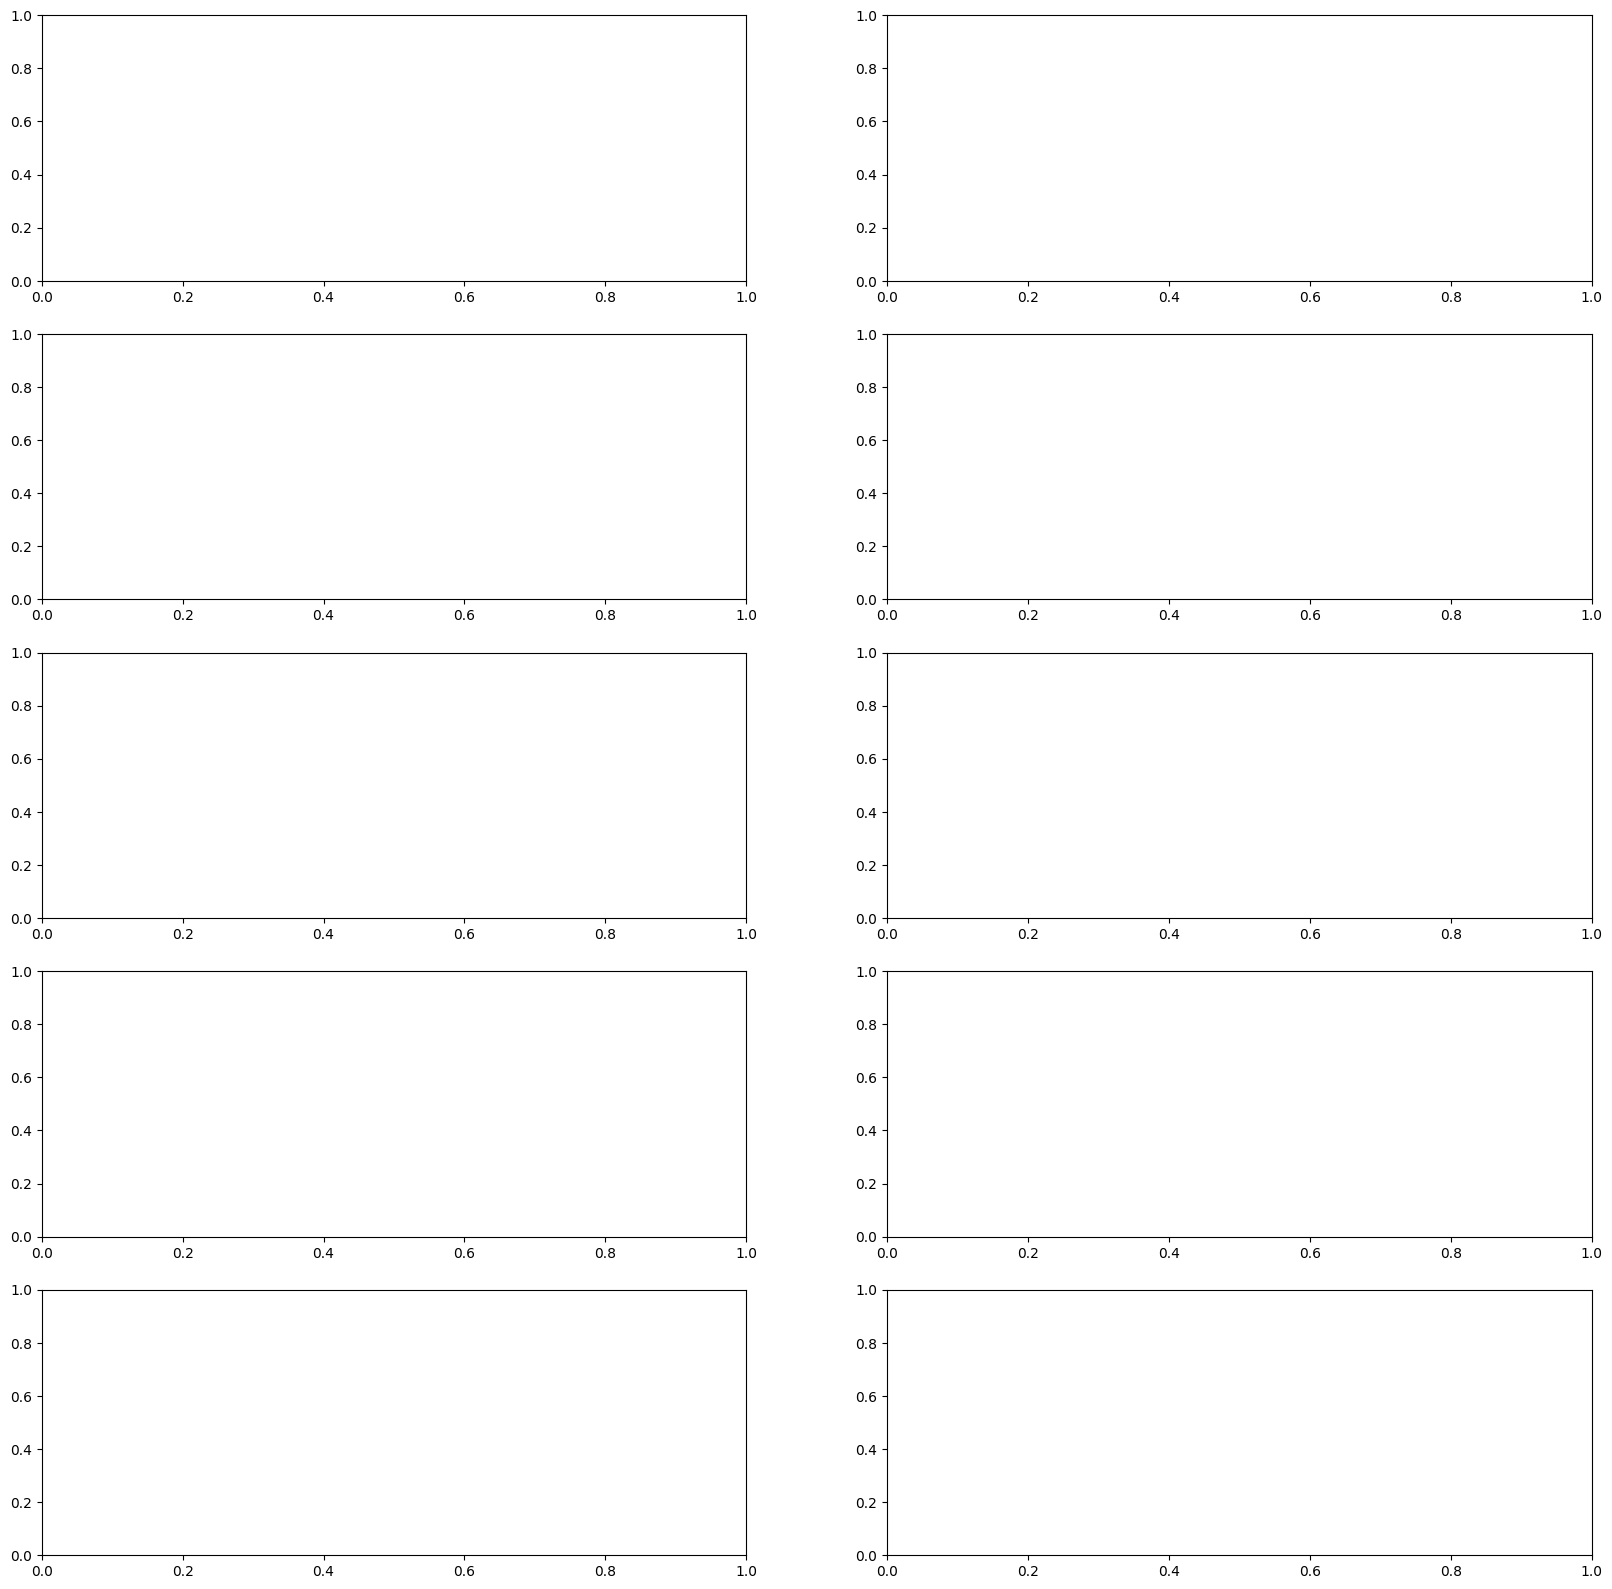

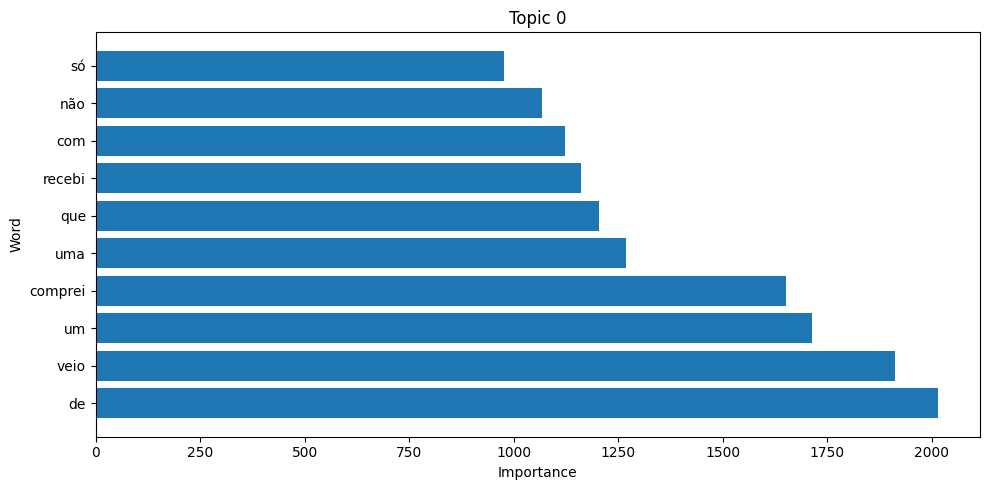

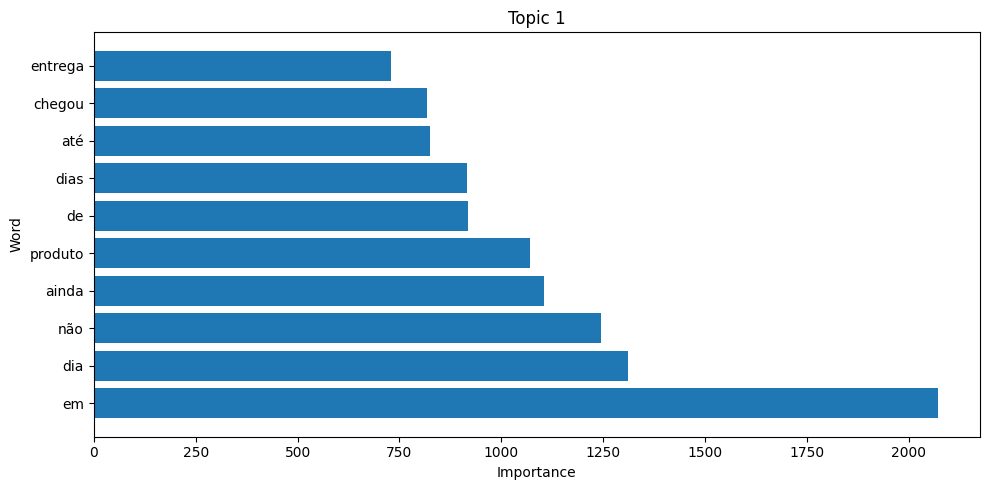

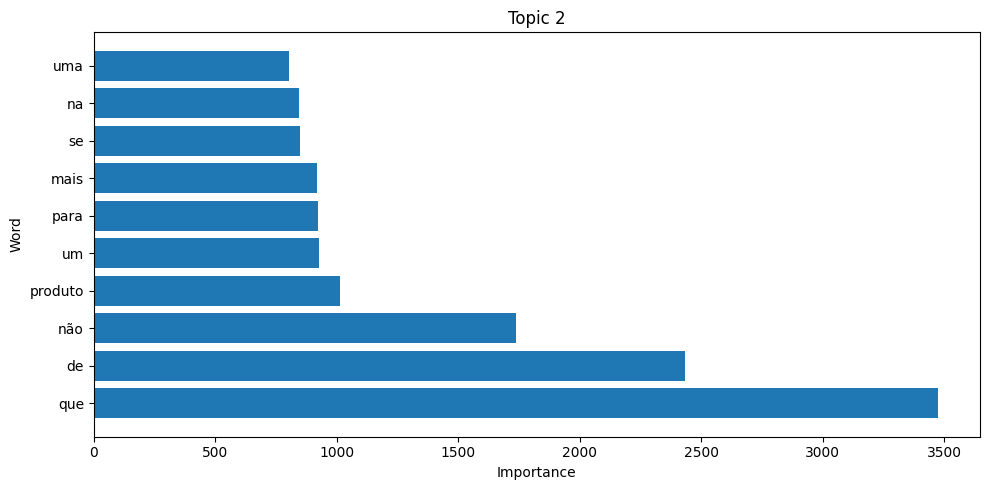

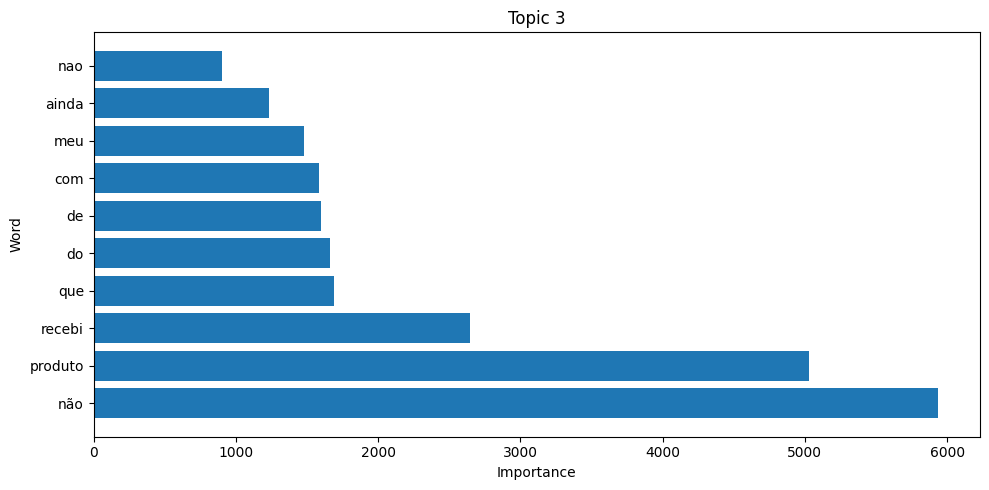

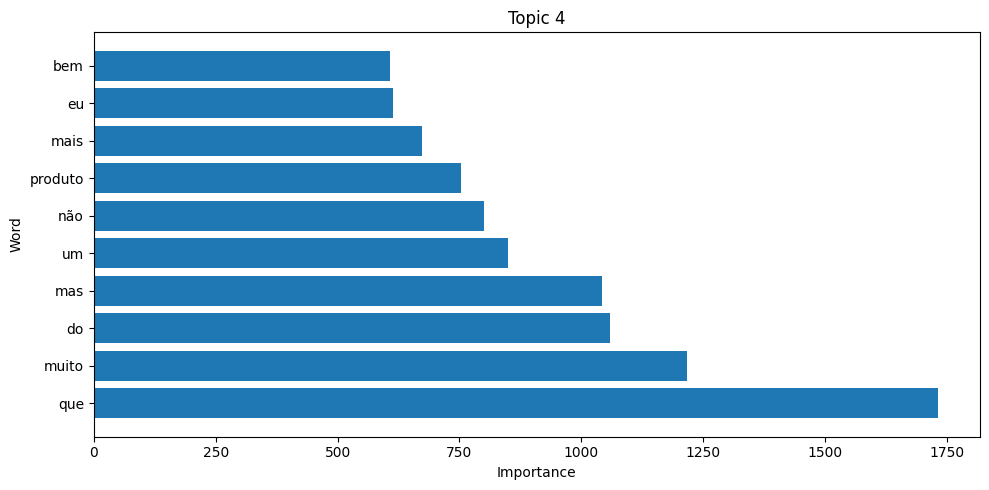

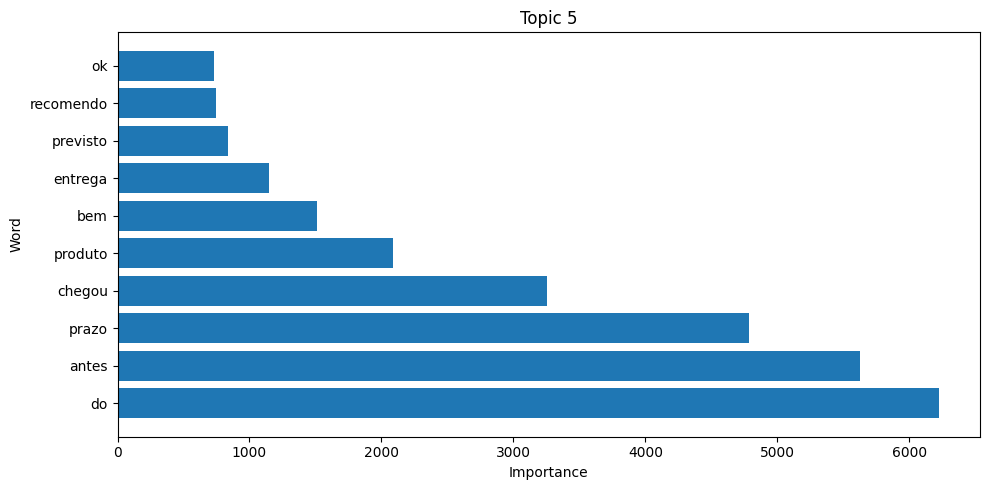

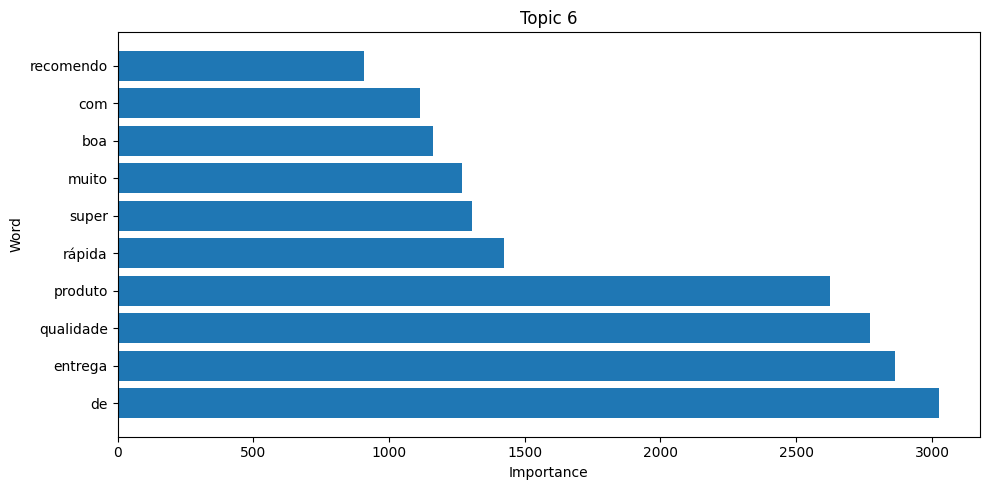

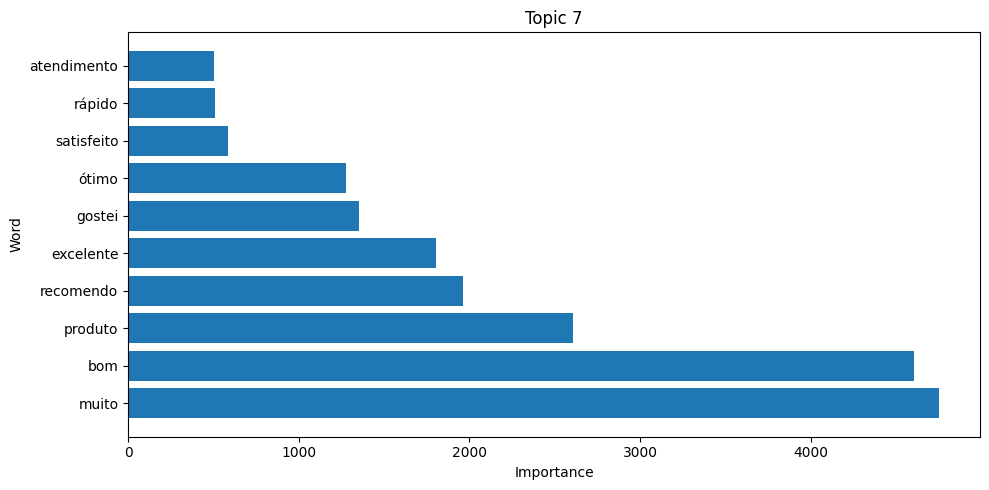

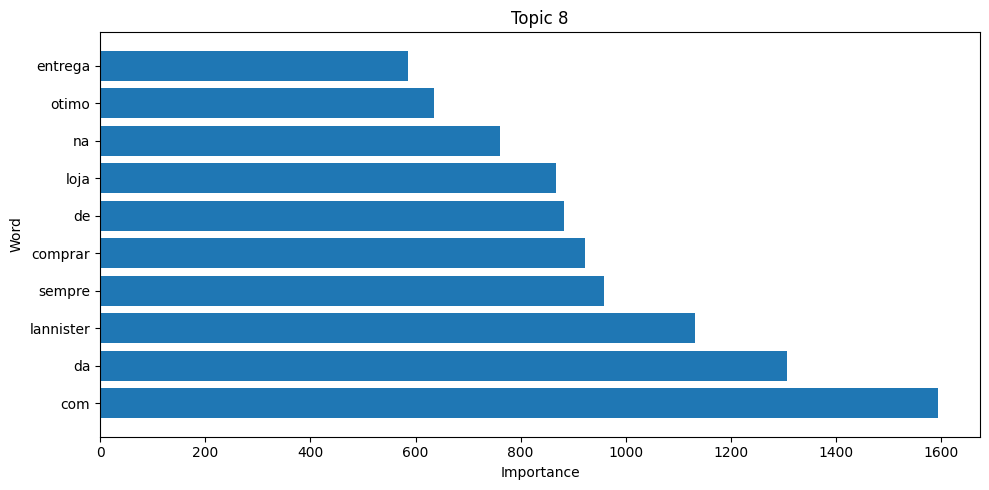

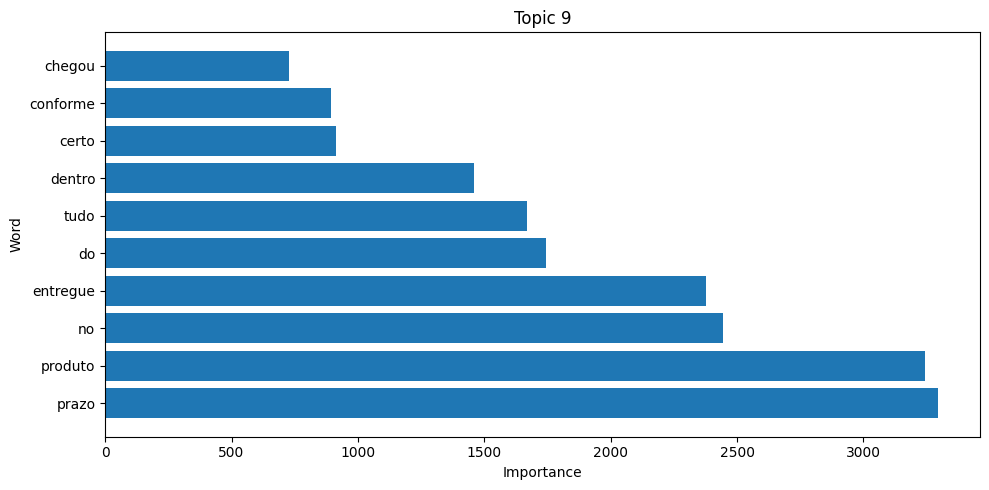

In [ ]:
#exercicio2
#não apague o comentário acima!!!
# Faça todo o seu código (e também os comentários) nesta célula!
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
import re
from nltk.stem import WordNetLemmatizer

# Para realizar esse exercício, primeiro irei utilizar um lemmatizer para lematizar as palavras do texto. Isso significa vai reduzir as palavras à sua forma dicionarizada (ou seja, sua raiz correta, chamada lema).
# Não irei utilizar o stemming, pois ele usa regras simples de corte de sufixos para reduzir uma palavra à sua raiz. Ele não leva em conta o significado da palavra, então pode gerar palavras que não existem no dicionário.
lemmatizer = WordNetLemmatizer()

def lematizar_texto(texto):
    palavras = re.findall(r'\w+', texto) # Esse regex irá extrair todas as palavras da linha do da coluna `review_comment_message`
    palavras_lematizadas = []
    for p in palavras:
        pl = lemmatizer.lemmatize(p)
        palavras_lematizadas.append(pl)
    return ' '.join(palavras_lematizadas) # Aqui ele junta as palavras lematizadas em uma string e retorna.

df['lematizados'] = df['review_comment_message'].apply(lematizar_texto)

# Novamente, iremos utilizar as stopwords para remover palavras que não são informativas, como "a", "e", "o", "de", etc.
# Obtive esse `stopwords.txt` de 'https://gist.github.com/alopes/5358189', que é uma lista de stopwords em português.
# Portanto, irei carregar a lista de stopwords.
STOP_WORDS = './stopwords.txt'
with open(STOP_WORDS, 'r') as f:
    stopwords = f.read().splitlines()

# Aqui, iremos criar uma pipeline com o vetorizador `CountVectorizer` e o modelo `LatentDirichletAllocation`.
# O `CountVectorizer` é um vetorizador que converte uma coleção de documentos de texto em uma matriz de contagens de tokens.
# Enquanto que o `LatentDirichletAllocation` é um modelo de tópico que é usado para descobrir tópicos latentes em um conjunto de documentos de texto.

# Justificativa:
# Vetorizador:
# Nesse caso, não iremos utilizar o `TfidfVectorizer`, pois o `CountVectorizer` é mais adequado para o modelo de tópico `LatentDirichletAllocation`.
# Isso porque o `CountVectorizer` converte uma coleção de documentos de texto em uma matriz de contagens de tokens, o que é mais adequado para o modelo de tópico `LatentDirichletAllocation`.
# Enquanto que o `TfidfVectorizer` converte uma coleção de documentos de texto em uma matriz de recursos TF-IDF, o que não é o ideal nessa circunstância.

# Modelo de Tópico:
# O modelo de tópico `LatentDirichletAllocation` é um modelo probabilístico que é usado para descobrir tópicos latentes em um conjunto de documentos de texto.
# Nesse caso, iremos utilizar o `LatentDirichletAllocation` para descobrir os tópicos latentes nos reviews dos clientes.

# Portanto, ao combinar o vetorizador `CountVectorizer` e o modelo de tópico `LatentDirichletAllocation`, podemos descobrir os tópicos latentes nos reviews dos clientes.
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        stop_words=stopwords,
        max_df=0.7, # Ignora termos que aparecem em mais de 70% dos documentos
        min_df=2, # Ignora termos que aparecem em menos de 2 documentos
    )),
    ('lda',
     LatentDirichletAllocation(
         n_components=10, # Número de tópicos
         max_iter=300, # Número máximo de iterações
         random_state=42, # Semente
     )),
])

# Aqui iremos treinar o modelo usando nossa pipeline:
pipeline.fit(df['review_comment_message'])
lda_output = pipeline.transform(df['review_comment_message']) # Obtém a distribuição de tópicos para cada documento
lda_model = pipeline.named_steps['lda'] # named_stepd['lda'] é o modelo de tópico `LatentDirichletAllocation` que foi treinado usando a pipeline.
feature_names = pipeline.named_steps['vectorizer'].get_feature_names_out() 
# get_feature_names_out() é uma função que retorna os nomes das palavras que foram extraídas do texto.
# no formato de lista de strings.

# Aqui, iremos calcular e printar as palavras mais proeminentes em cada tópico e o número de documentos cujo tópico mais proeminente é esse.
# Em código, iremos então percorrer cada indice de tópico e para cada tópico , iremos contar o número de documentos cujo tópico mais proeminente é esse, por isso percorremos o lda_model.components_.
# Que é uma matriz que contém as palavras mais proeminentes em cada tópico.
# Utilizarmos o argsort para ordenar os tópicos em ordem decrescente e pegar as 10 palavras mais proeminentes, por isso junto com ele usamos o slicing [:-11:-1], que 
# pega as 10 últimas palavras.
most_prominent_topic = lda_output.argmax(axis=1)
for topic_idx, topic in enumerate(lda_model.components_):
    num_documents = (most_prominent_topic == topic_idx).sum()
    print(f"Topic {topic_idx} ({num_documents} documents):")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

# Agora, iremos plotar a relação entre as palavras mais proeminentes em cada tópico.
# Para isso, iremos percorrer cada tópico e plotar um gráfico de barras horizontal que mostra as palavras mais proeminentes em cada tópico.
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for topic_idx, topic in enumerate(lda_model.components_):
    plt.figure(figsize=(10, 5))
    labels = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    values = topic[topic.argsort()[:-11:-1]]
    plt.barh(labels, values)
    plt.title(f"Topic {topic_idx}")
    plt.xlabel('Importance')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

# Resultados:

# Topic 0 (3869 documents):
# de veio um comprei uma que recebi com não só
# Topic 1 (2087 documents):
# em dia não ainda produto de dias até chegou entrega
# Topic 2 (4270 documents):
# que de não produto um para mais se na uma
# Topic 3 (6135 documents):
# não produto recebi que do de com meu ainda nao
# Topic 4 (3159 documents):
# que muito do mas um não produto mais eu bem
# Topic 5 (5034 documents):
# do antes prazo chegou produto bem entrega previsto recomendo ok
# Topic 6 (4760 documents):
# de entrega qualidade produto rápida super muito boa com recomendo
# Topic 7 (5207 documents):
# muito bom produto recomendo excelente gostei ótimo satisfeito rápido atendimento
# Topic 8 (2856 documents):
# com da lannister sempre comprar de loja na otimo entrega
# Topic 9 (3600 documents):
# prazo produto no entregue do tudo dentro certo conforme chegou

# Enunciado:
# Resumo:
# *   **Elogios:** Entrega rápida/no prazo e boa qualidade do produto são os pontos fortes.
# *   **Reclamações:** Problemas com a entrega (não recebimento, atraso) e produtos com defeito/qualidade inferior são os principais pontos fracos.

# Análise:
#  use comentários no código para explicar como suas descobertas corroboram, contradizem, ou relativizam o que foi proposto pelo LLM.
# Ao analisarmos os tópicos latentes nos reviews dos clientes, podemos observar que os tópicos mais proeminentes são relacionados a entrega, qualidade do produto e satisfação do cliente.
# No geral, os tópicos demonstram que os clientes estão satisfeitos com a entrega rápida/no prazo e a boa qualidade do produto. E, ao contrário, da LLM, podemos observar que alguns clientes estão satisfeitos com a entrega e a qualidade do produto. 
# Enquanto, outros não

# Exemplos:
# Como vemos no tópico 5 - gostam da entrega rápida e do produto:
#  do antes prazo chegou produto bem entrega previsto recomendo ok

# E no tópico 3 - não acharam a entrega rápida:
#  não produto recebi que do de com meu ainda nao


# Portanto, podemos concluir que os tópicos latentes nos reviews dos clientes corroboram em partes, com o que foi proposto pelo LLM, pois os há clientes satisfeitos com a entrega e a qualidade do produto, enquanto outros não estão satisfeitos com a entrega.


# Rubricas e auto-avaliação assistida por IA

Este teste tem duas questões. Porém, são questões bastante complexas. Para verificar se você não esqueceu de nada em nenhuma questão, você pode usar o script `autoavaliacao.py`.

Cada um dos ítens cumpridos corretamente nas rubricas disponíveis em `autoavaliacao.py` terão o mesmo valor nas questões (1/8 na questão 1, 1/4 na questão 2). Um ítem cumprido parcialmente vale metade dos pontos. Um ítem feito errado não vale pontos. Cada uma das questões tem o mesmo valor (50% do total).

**IMPORTANTE**: o fato de o LLM dizer que um ítem da rubrica foi cumprido, não significa que ele **realmente** foi cumprido. O LLM avalia apenas se o ítem **existe**. O LLM é uma **ferramenta** e a sua utilidade depende do **seu** julgamento crítico.

Após o término da prova, salve seu notebook e entregue no Blackboard.

## Avaliação da prova

Se desejar, comente os pontos abaixo:

**Experiência da prova**: ao fazer esta prova, me senti...

**Dificuldades técnicas ou de compreensão do enunciado**: ...

**O script de auto-avaliação me ajudou**: sim, não, em partes...?

In [ ]:
# Gostei